In [ ]:
!pip3 install torch torchvision

In [48]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [49]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

In [50]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

Text(0.5, 1.0, '[1]')

Text(0.5, 1.0, '[0]')

Text(0.5, 1.0, '[9]')

Text(0.5, 1.0, '[1]')

Text(0.5, 1.0, '[1]')

Text(0.5, 1.0, '[2]')

Text(0.5, 1.0, '[7]')

Text(0.5, 1.0, '[5]')

Text(0.5, 1.0, '[7]')

Text(0.5, 1.0, '[4]')

Text(0.5, 1.0, '[4]')

Text(0.5, 1.0, '[7]')

Text(0.5, 1.0, '[3]')

Text(0.5, 1.0, '[6]')

Text(0.5, 1.0, '[0]')

Text(0.5, 1.0, '[6]')

Text(0.5, 1.0, '[4]')

Text(0.5, 1.0, '[1]')

Text(0.5, 1.0, '[4]')

Text(0.5, 1.0, '[0]')

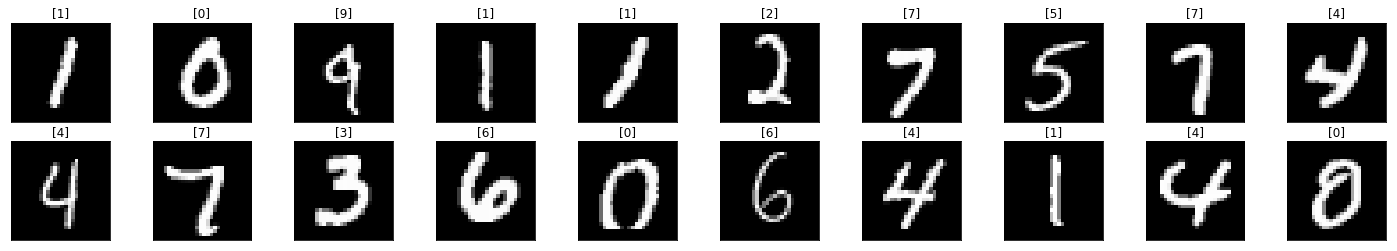

In [51]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])
  

In [52]:
class Classifier(nn.Module):
    
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))  
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [53]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [54]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [55]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
  
    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

    with torch.no_grad():
        for val_inputs, val_labels in validation_loader:
            val_inputs = val_inputs.view(val_inputs.shape[0], -1)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)

            _, val_preds = torch.max(val_outputs, 1)
            val_running_loss += val_loss.item()
            val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.9692, acc 75.8533 
validation loss: 0.4343, validation acc 88.2800 
epoch : 2
training loss: 0.3862, acc 89.1367 
validation loss: 0.3380, validation acc 90.0600 
epoch : 3
training loss: 0.3255, acc 90.6100 
validation loss: 0.2906, validation acc 91.5200 
epoch : 4
training loss: 0.2948, acc 91.4367 
validation loss: 0.2716, validation acc 92.1600 
epoch : 5
training loss: 0.2722, acc 92.0767 
validation loss: 0.2553, validation acc 92.3900 
epoch : 6
training loss: 0.2511, acc 92.6783 
validation loss: 0.2349, validation acc 92.8100 
epoch : 7
training loss: 0.2331, acc 93.2017 
validation loss: 0.2200, validation acc 93.2600 
epoch : 8
training loss: 0.2158, acc 93.6617 
validation loss: 0.2016, validation acc 93.9300 
epoch : 9
training loss: 0.1995, acc 94.2250 
validation loss: 0.1898, validation acc 94.2700 
epoch : 10
training loss: 0.1854, acc 94.6617 
validation loss: 0.1776, validation acc 94.6600 
epoch : 11
training loss: 0.1735, acc 94.9850 
va

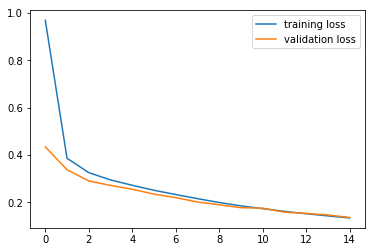

In [56]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

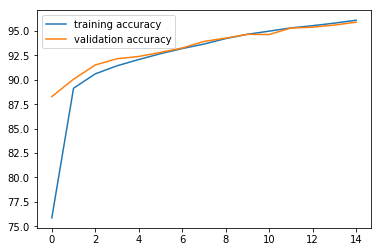

In [57]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [58]:
# !pip3 install pillow

In [59]:
import PIL.ImageOps

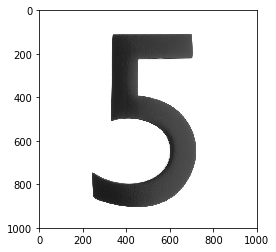

In [60]:
import requests
from PIL import Image

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

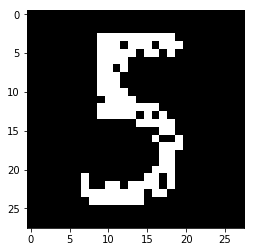

In [61]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img) 
plt.imshow(im_convert(img))

In [62]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)
print(pred.item())

5


Text(0.5, 1.0, '7 (7)')

Text(0.5, 1.0, '2 (2)')

Text(0.5, 1.0, '1 (1)')

Text(0.5, 1.0, '0 (0)')

Text(0.5, 1.0, '4 (4)')

Text(0.5, 1.0, '1 (1)')

Text(0.5, 1.0, '4 (4)')

Text(0.5, 1.0, '9 (9)')

Text(0.5, 1.0, '6 (5)')

Text(0.5, 1.0, '9 (9)')

Text(0.5, 1.0, '0 (0)')

Text(0.5, 1.0, '6 (6)')

Text(0.5, 1.0, '9 (9)')

Text(0.5, 1.0, '0 (0)')

Text(0.5, 1.0, '1 (1)')

Text(0.5, 1.0, '5 (5)')

Text(0.5, 1.0, '9 (9)')

Text(0.5, 1.0, '7 (7)')

Text(0.5, 1.0, '3 (3)')

Text(0.5, 1.0, '4 (4)')

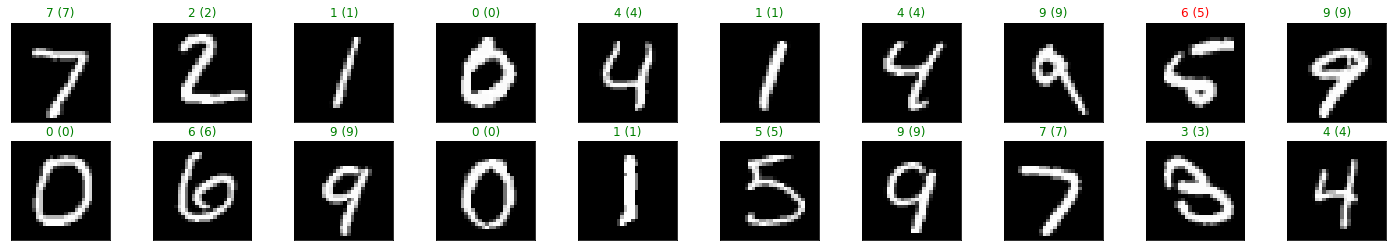

In [63]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = images.view(images.shape[0], -1)
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))